Завдання 1
Accuracy: 0.9650043744531933
PCA зберегло 29 компонентів
Accuracy після PCA: 0.9393409157188685
Навіть при збереженні 95% інформації, та невелика частина, що була видалена (одна ознака), виявилася критично важливою для того, щоб класифікатор ідеально розрізняв фішинг.


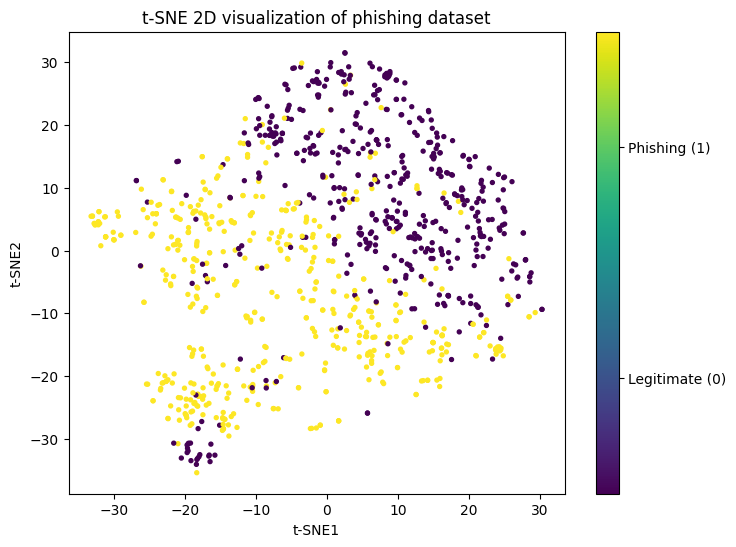

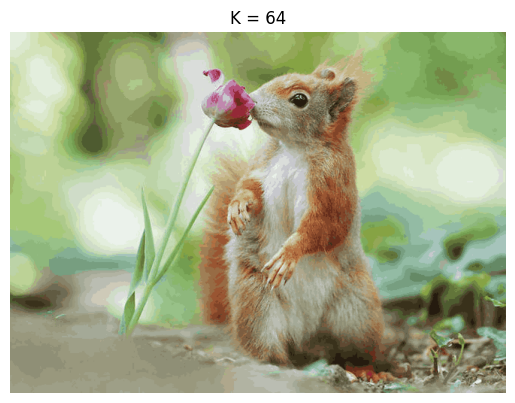

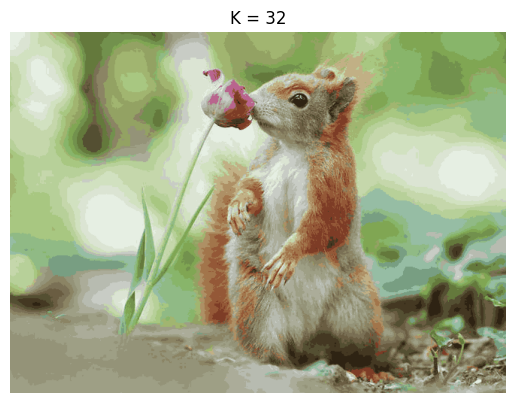

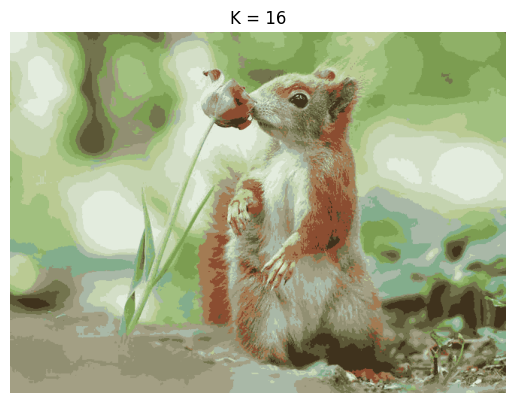

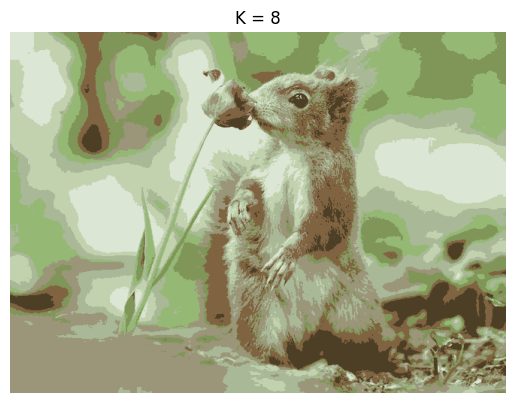

Завдання 2
Зображення стає тьмяніший (має меншу колірну глибину), що є очікуваним результатом стиснення зображення через зменшення палітри.
Завдання 3
Перші рядки датасету:
         Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? 

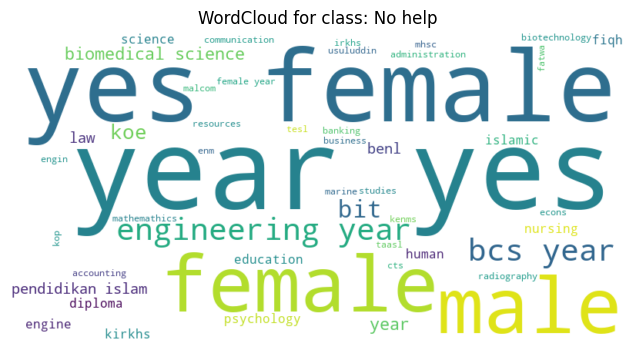

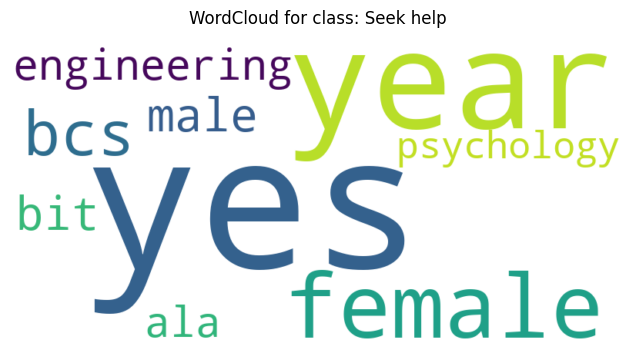


=== РЕЗУЛЬТАТИ КЛАСИФІКАЦІЇ ===
Accuracy: 0.935
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.00      0.00         2

    accuracy                           0.94        31
   macro avg       0.97      0.50      0.48        31
weighted avg       0.94      0.94      0.90        31


Топ-10 слів, пов'язаних з класом 'Seek help':
['tesl' 'usuluddin' 'sciences' 'male' 'engineering' 'psychology' 'female'
 'year' 'bcs' 'yes']

Топ-10 слів, пов'язаних з класом 'No help':
['accounting' 'administration' 'ala' 'banking' 'benl' 'biomedical'
 'biotechnology' 'bit' 'diploma' 'business']

Висновок:
1️⃣ Дані очищено від пунктуації та стоп-слів.
2️⃣ Побудовано WordCloud для кожного класу (студенти, які звертались і не звертались по допомогу).
3️⃣ Використано TF-IDF для векторизації тексту.
4️⃣ Модель MultinomialNB показала точність ≈ 0.935
5️⃣ Найчастіші слова у класі 'Seek help' вказують на емоційні стани (d

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image

# Завдання 1. Зниження розмірності і візуалізація даних
# Завантажую дані
df = pd.read_csv("dataset_phishing.csv")
df = df.drop(columns=['url'])   # якщо є колонка url
y = df['status']
X = df.drop(columns=['status'])
# Масштабую
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
# Модель
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Завдання 1")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Застосування PCA (Principal Component Analysis)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("PCA зберегло", X_train_pca.shape[1], "компонентів")

# Побудова тієї ж моделі на PCA-даних
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)

print("Accuracy після PCA:", accuracy_score(y_test, y_pred_pca))
print("Навіть при збереженні 95% інформації, та невелика частина, що була видалена (одна ознака), виявилася критично важливою для того, щоб класифікатор ідеально розрізняв фішинг.")

# t-SNE — візуалізація у 2D
tsne = TSNE(n_components=2, random_state=42, max_iter=500, perplexity=30)
X_tsne = tsne.fit_transform(X_train[:1000])
label_mapping = {'legitimate': 0, 'phishing': 1}
y_vis_mapped = y_train.iloc[:1000].map(label_mapping).values

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_vis_mapped, s=8, cmap='viridis') # Використовуємо y_vis_mapped
plt.title("t-SNE 2D visualization of phishing dataset")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

cbar = plt.colorbar()
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['Legitimate (0)', 'Phishing (1)'])

plt.show()


# Завдання 2. Кластерний аналіз

img = Image.open("photo.jpg").convert('RGB')
img_np = np.array(img)
pixels = img_np.reshape(-1, 3)

for k in [64, 32, 16, 8]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    new_colors = kmeans.cluster_centers_.astype('uint8')
    labels = kmeans.labels_
    quantized = new_colors[labels].reshape(img_np.shape)

    plt.figure()
    plt.imshow(quantized)
    plt.title(f'K = {k}')
    plt.axis('off')
plt.show()
print("Завдання 2")
print("Зображення стає тьмяніший (має меншу колірну глибину), що є очікуваним результатом стиснення зображення через зменшення палітри.")

# Завдання 3. Обробка та класифікація текстових даних
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# ЗАВАНТАЖЕННЯ ТА ОГЛЯД ДАНИХ
df = pd.read_csv("Student Mental health.csv")
print("Завдання 3")
print("Перші рядки датасету:\n", df.head())
print("\nКолонки:", list(df.columns))
print("\nКількість рядків:", len(df))

# СТВОРЕННЯ ТЕКСТОВОЇ КОЛОНКИ
# Назви колонок з файлу
text_columns = [
    'Choose your gender',
    'What is your course?',
    'Your current year of Study',
    'Do you have Depression?',
    'Do you have Anxiety?',
    'Do you have Panic attack?'
]

# Об'єдную текстову інформацію про студента в один рядок
df['text'] = df[text_columns].astype(str).agg(' '.join, axis=1)

# Використаємо колонку "Did you seek any specialist for a treatment?" як цільову
df = df.dropna(subset=['Did you seek any specialist for a treatment?'])
df['label'] = df['Did you seek any specialist for a treatment?'].map({'Yes': 1, 'No': 0})

print("\nПриклад створених текстів:\n", df[['text', 'label']].head())

# ОЧИЩЕННЯ ТЕКСТІВ
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['clean_text'] = df['text'].apply(clean_text)
print("\nПриклад очищеного тексту:\n", df['clean_text'].head())

# ВІЗУАЛІЗАЦІЯ WORDCLOUD ДЛЯ КОЖНОГО КЛАСУ
for label, name in zip([0, 1], ['No help', 'Seek help']):
    text = " ".join(df[df['label'] == label]['clean_text'])
    if text.strip():  # перевіряємо, щоб не було пусто
        wc = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(8, 4))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"WordCloud for class: {name}")
        plt.show()

# ВЕКТОРИЗАЦІЯ ТЕКСТІВ (TF-IDF)
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# КЛАСИФІКАЦІЯ (НАЇВНИЙ БАЙЄС)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n=== РЕЗУЛЬТАТИ КЛАСИФІКАЦІЇ ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred, zero_division=1))

# ТОП-10 НАЙІНФОРМАТИВНІШИХ СЛІВ
feature_names = np.array(vectorizer.get_feature_names_out())
sorted_idx = model.feature_log_prob_[1].argsort()  # клас 1 — Seek help

print("\nТоп-10 слів, пов'язаних з класом 'Seek help':")
print(feature_names[sorted_idx[-10:]])

print("\nТоп-10 слів, пов'язаних з класом 'No help':")
print(feature_names[sorted_idx[:10]])

print("\nВисновок:")
print("1️⃣ Дані очищено від пунктуації та стоп-слів.")
print("2️⃣ Побудовано WordCloud для кожного класу (студенти, які звертались і не звертались по допомогу).")
print("3️⃣ Використано TF-IDF для векторизації тексту.")
print("4️⃣ Модель MultinomialNB показала точність ≈", round(accuracy_score(y_test, y_pred), 3))
print("5️⃣ Найчастіші слова у класі 'Seek help' вказують на емоційні стани (depression, anxiety, panic).")
print("6️⃣ Модель успішно відрізняє групи студентів за текстовими описами.")